In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import IPython.display
import time

In [2]:
ds = xr.open_dataset("data.grib")
ds

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


<xarray.Dataset>
Dimensions:     (time: 12, latitude: 25, longitude: 45)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2023-10-03 ... 2023-10-04T20:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 55.0 54.75 54.5 54.25 ... 49.5 49.25 49.0
  * longitude   (longitude) float64 14.0 14.25 14.5 14.75 ... 24.5 24.75 25.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    t2m         (time, latitude, longitude) float32 ...
    sp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-10-13T13:56 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
ds.t2m.shape

(12, 25, 45)

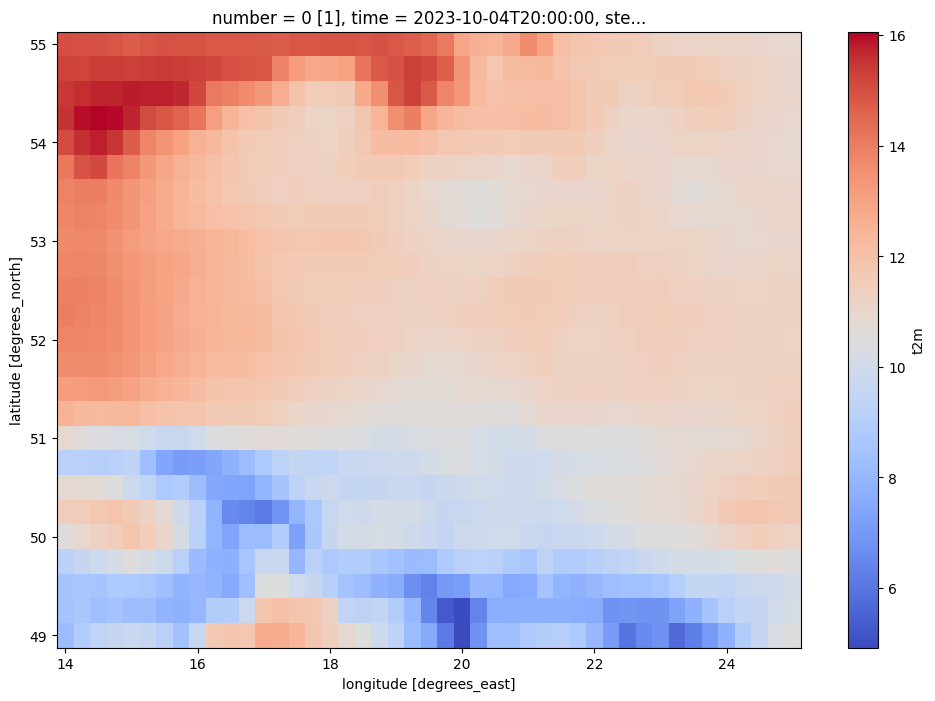

In [4]:
ds = ds - 273.15
for i in range(len(ds.t2m)):
    IPython.display.clear_output(wait=True)
    plt.figure(figsize=(12,8))
    ds.t2m[i].plot(cmap=plt.cm.coolwarm)
    plt.show()
    time.sleep(0.2)

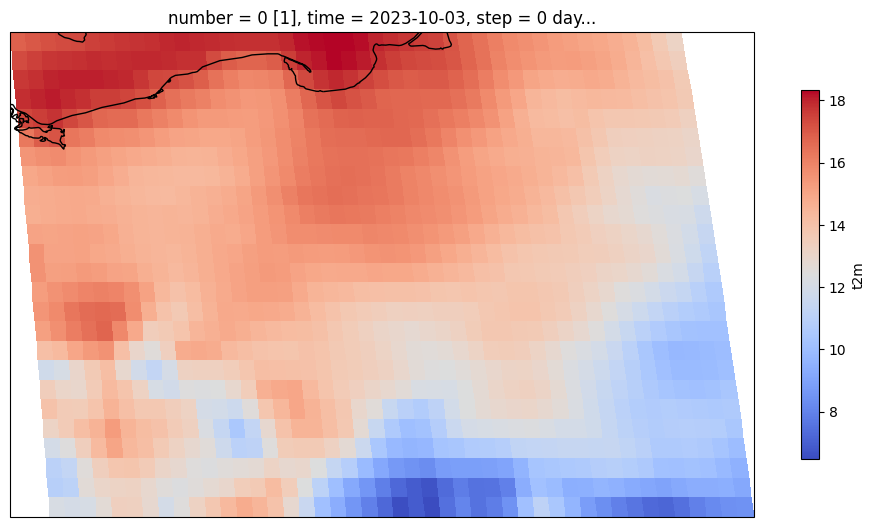

In [5]:
import cartopy.crs as ccrs
import cartopy

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution="10m")
plot = ds.t2m[0].plot(
    cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
)

# wiekszy obszar w pliku grib powinien rysowac polske ladnie